Install yahoo finance to pull in data

---



In [ ]:
! pip install yfinance

Import all functions

---



In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

bring in bitcoin and S&P 500 data

---



In [ ]:
btc = yf.Ticker("BTC-USD")
SP500 = yf.Ticker("SPY")

In [ ]:
df_btc = pd.DataFrame(data = btc.history(start="2014-09-17"))
df_SP500 = pd.DataFrame(data = SP500.history(start="2014-09-17"))

Remove dividends and stock splits columns

---



In [ ]:
df_btc = df_btc.drop(columns = ["Dividends", "Stock Splits"])
df_SP500 = df_SP500.drop(columns = ["Dividends", "Stock Splits"])

Calcualte volatitlity

---



In [ ]:
df_btc['log_ret'] = np.log(df_btc['Close']/df_btc['Close'].shift(1))
df_btc['Volatility'] = df_btc['log_ret'].rolling(window = 10).std() * np.sqrt(10)
df_SP500['log_ret'] = np.log(df_SP500['Close']/df_SP500['Close'].shift(1))
df_SP500['Volatility'] = df_SP500['log_ret'].rolling(window = 10).std() * np.sqrt(10)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3ed72c6f28>,
      dtype=object)

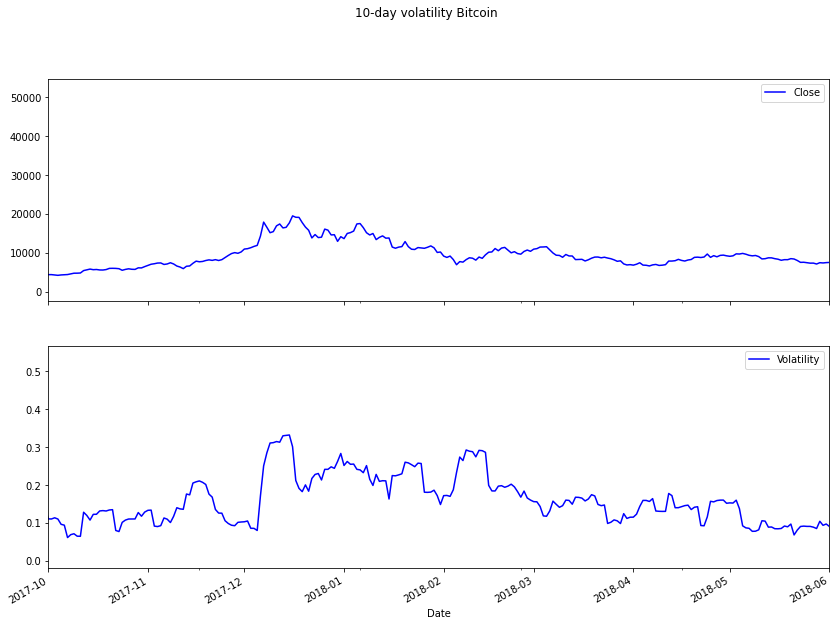

In [ ]:
df_btc[['Close', 'Volatility']].plot(
    title = "10-day volatility Bitcoin", 
    subplots=True, 
    color='blue',
    figsize=(14, 10),
    xlim=(pd.Timestamp('2017-10-01'), pd.Timestamp('2018-06-01'))
    )

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3ed71d92e8>,
      dtype=object)

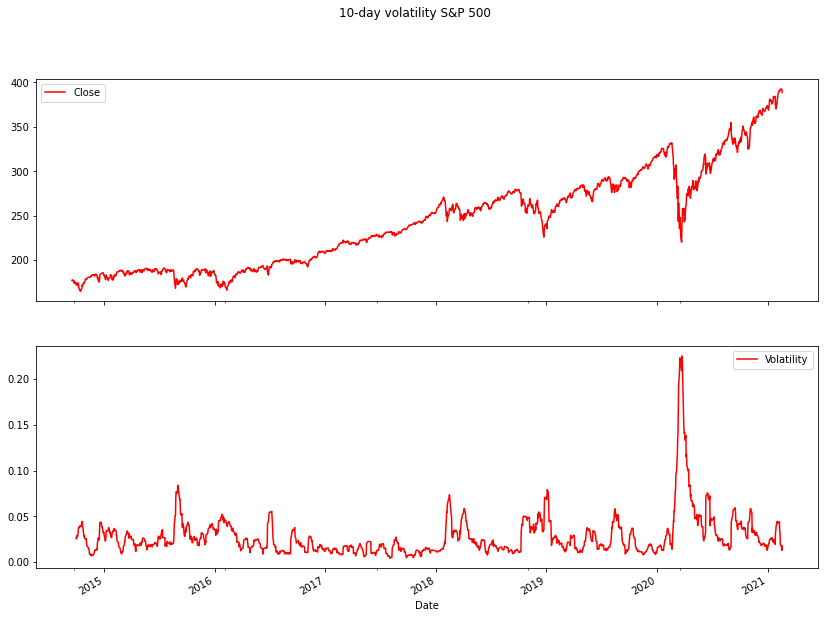

In [ ]:
df_SP500[['Close', 'Volatility']].plot(
    title = "10-day volatility S&P 500", 
    subplots=True, 
    color='red',
    figsize=(14, 10),
    
    )

In [ ]:
df_btc["Percent_change"] = (df_btc['Close'].shift(1) - df_btc['Close'])/df_btc['Close']

Setup for back trading test

---



In [ ]:
# starting amount in dollars
Start = 100

# Amount added to each buy
buy_Increment = 10

# buy trigger - percent gain limit in percent
gain_limit = 0.01

# Sell trigger upper -  gain limit in percent
sell_gain = 0.02 

# Sell trigger lower - lose stop
sell_lose = -0.03

# Starting date
start_date = pd.to_datetime("2017-01-01")

#stop date
stop_date = pd.to_datetime("2019-01-01")

In [ ]:

for index, values in df_btc.iterrows():
  print(index, values["Close"])

2014-09-17 00:00:00 457.3340148925781
2014-09-18 00:00:00 424.44000244140625
2014-09-19 00:00:00 394.7959899902344
2014-09-20 00:00:00 408.90399169921875
2014-09-21 00:00:00 398.8210144042969
2014-09-22 00:00:00 402.1520080566406
2014-09-23 00:00:00 435.7909851074219
2014-09-24 00:00:00 423.2049865722656
2014-09-25 00:00:00 411.5740051269531
2014-09-26 00:00:00 404.42498779296875
2014-09-27 00:00:00 399.5199890136719
2014-09-28 00:00:00 377.1809997558594
2014-09-29 00:00:00 375.4670104980469
2014-09-30 00:00:00 386.9440002441406
2014-10-01 00:00:00 383.614990234375
2014-10-02 00:00:00 375.0719909667969
2014-10-03 00:00:00 359.5119934082031
2014-10-04 00:00:00 328.8659973144531
2014-10-05 00:00:00 320.510009765625
2014-10-06 00:00:00 330.0790100097656
2014-10-07 00:00:00 336.18701171875
2014-10-08 00:00:00 352.94000244140625
2014-10-09 00:00:00 365.0260009765625
2014-10-10 00:00:00 361.56201171875
2014-10-11 00:00:00 362.29901123046875
2014-10-12 00:00:00 378.54901123046875
2014-10-13 0